In [13]:
#Importing the necessary libraries for the exploration of the data, statistics and machine learning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina' 


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

# Trips data analysis code file for CA1, Gavin Davis, sba22311

## File consists of sections 1.1 to 1.14

In [14]:
df = pd.read_csv("trips.csv") #reading in the trips.csv dataset

#  

# 1.1 Exploratory Data Analysis

In [15]:
df.head(20) #observing the first 20 rows of the dataset to examine its contents and features

,# Route,Link,Direction,STT,AccSTT,TCS1,TCS2
0,1,1,1,128,128,2127,175
1,1,1,2,61,61,175,2127
2,1,2,1,106,234,175,174
3,1,2,2,52,113,174,175
4,1,3,1,8,242,174,615
5,1,3,2,11,124,615,174
6,1,4,1,32,274,615,243
7,1,4,2,16,140,243,615
8,1,5,1,31,305,243,448
9,1,5,2,16,156,448,243


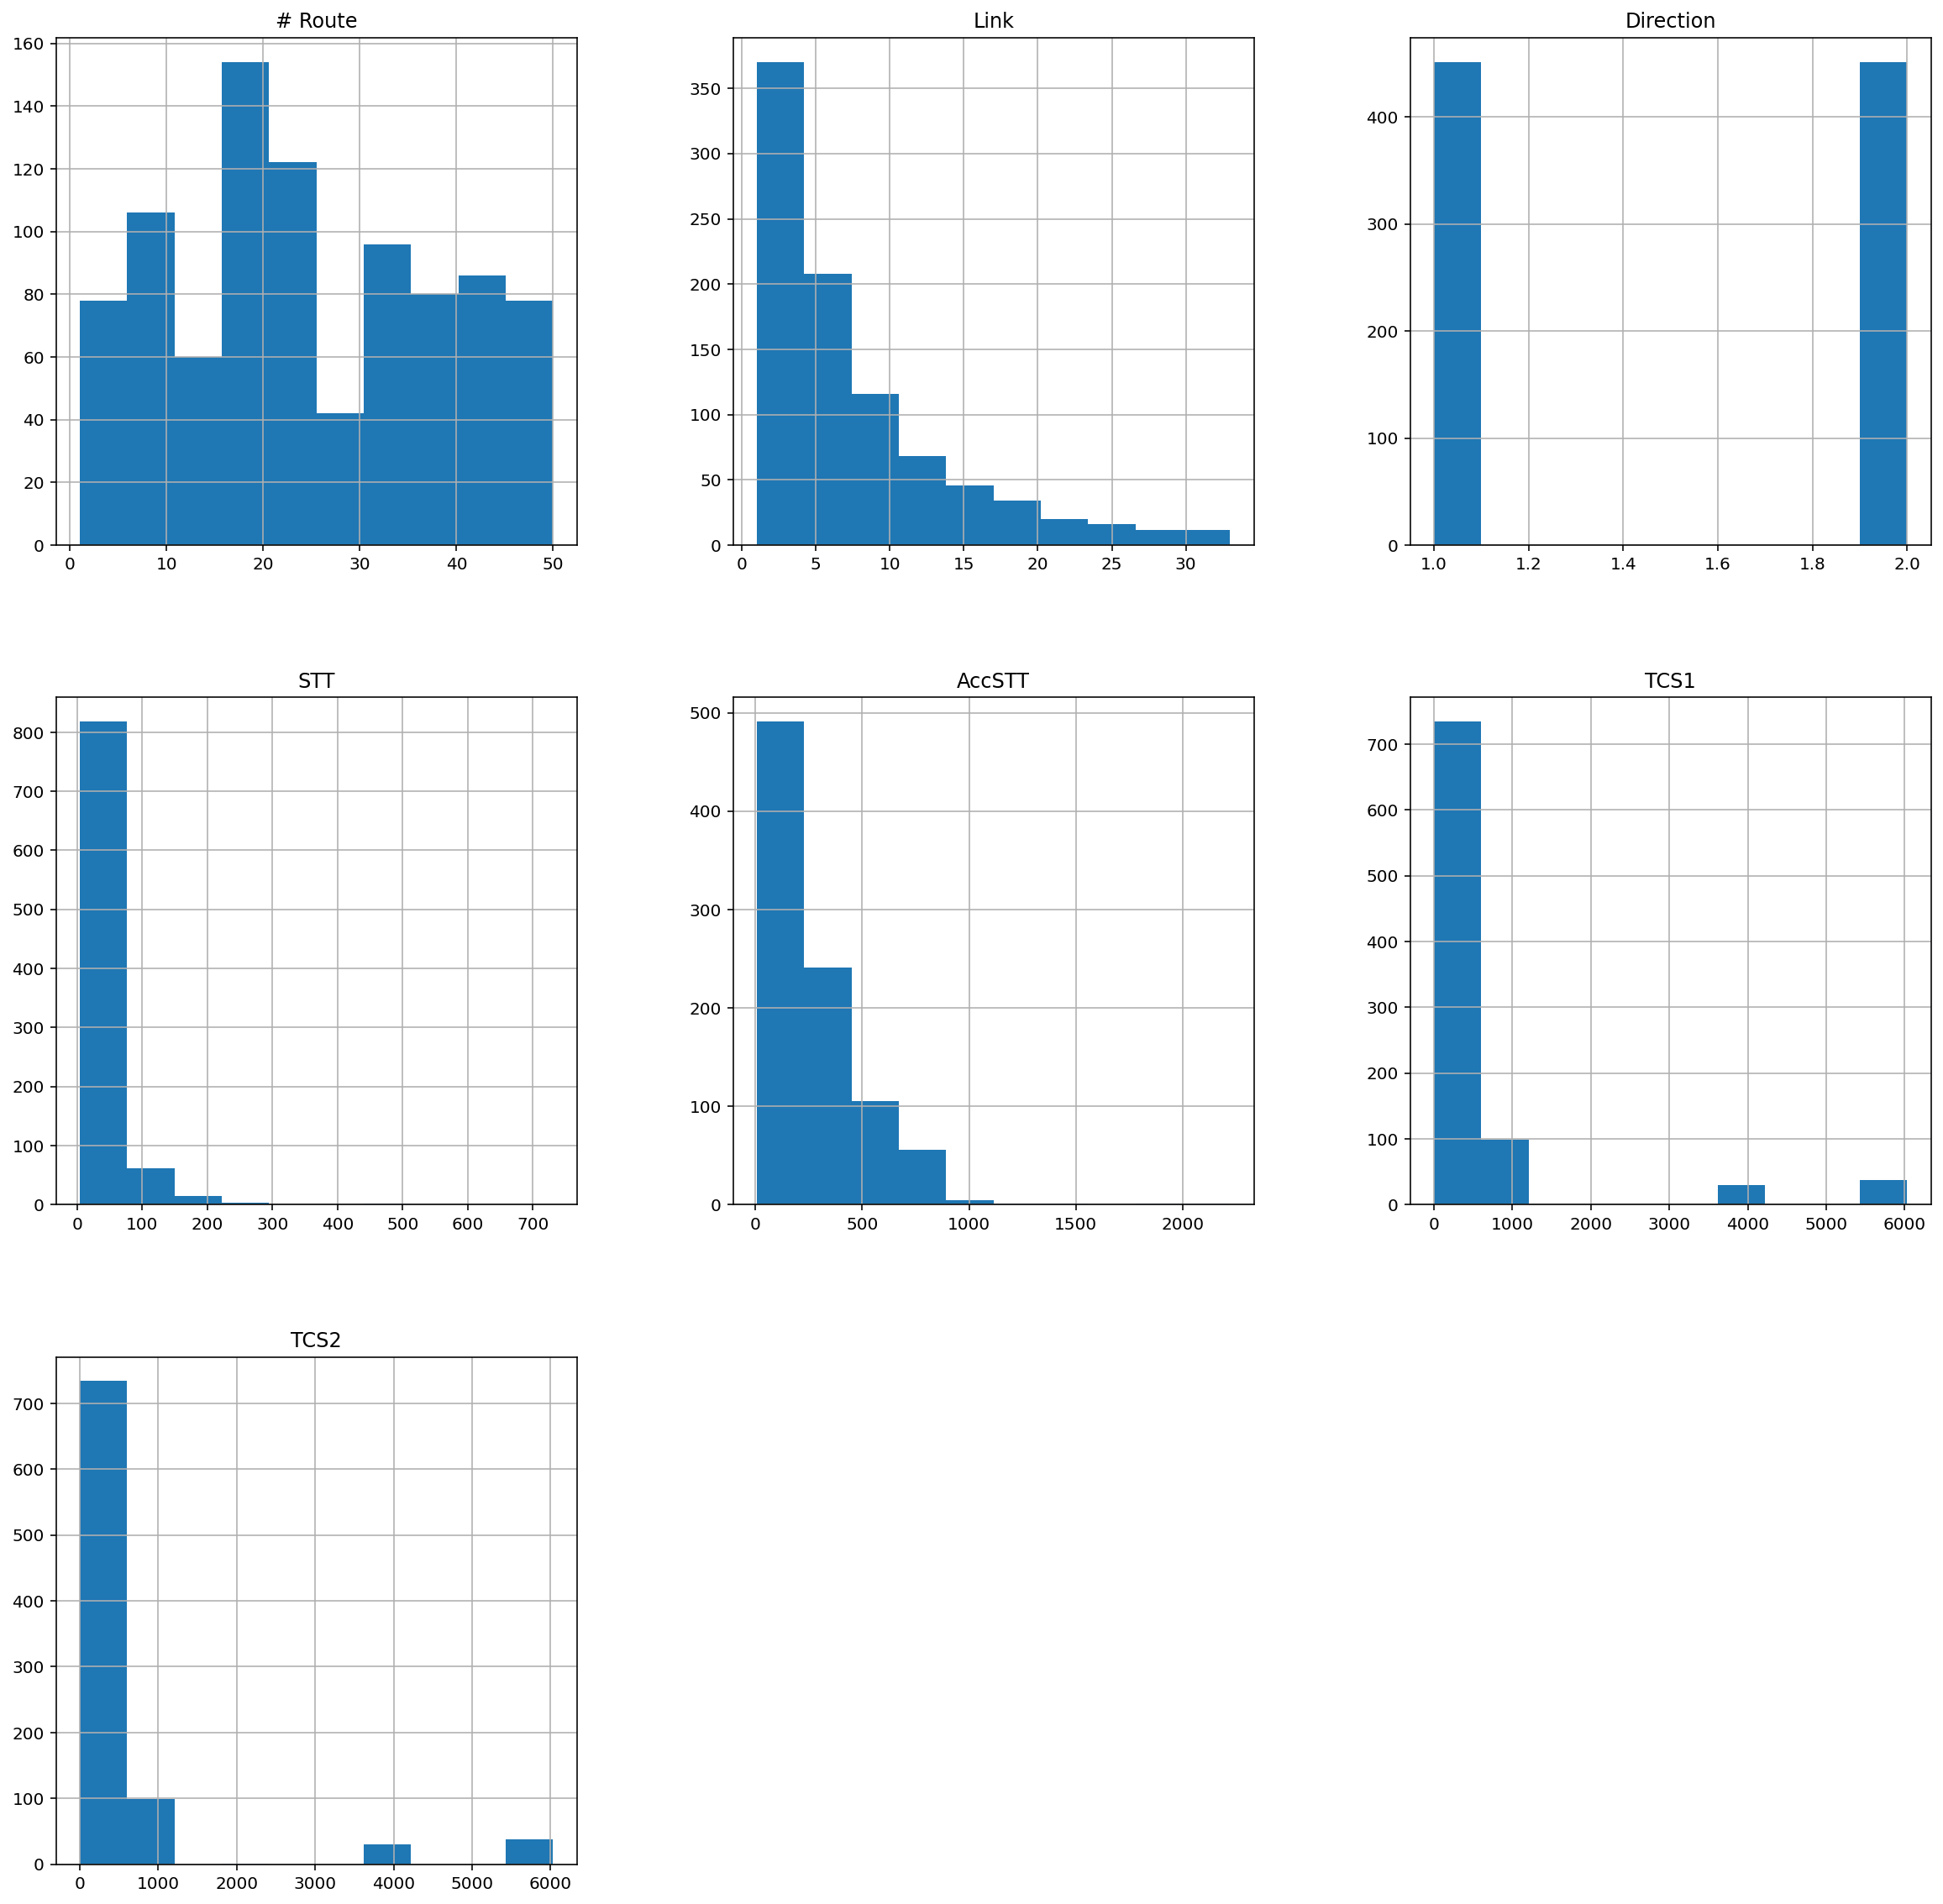

In [16]:
df.hist(figsize=(20,20)); #examining the spread of the data using histograms

- Route appears to be seems to be an identifyer as does Link
- Direction can be one of two values 1 or 2
- STT appears to be a left skewed distribution consisting of values mainly below 100
- AccSTT is a left skewed diistribution with values of approximately 1000 and below
- TCS1/2 appear to be identifyers

In [17]:
df.shape #assessing the size and shape of the dataset, it consists of 902 rows and 7 columns

(902, 7)

In [18]:
df.isnull().sum() #Checking to see if there is any null values in the dataset, there appear to be none

# Route      0
Link         0
Direction    0
STT          0
AccSTT       0
TCS1         0
TCS2         0
dtype: int64

In [19]:
df.dtypes #checking the variable types of the dataset, all appear to be integers

# Route      int64
Link         int64
Direction    int64
STT          int64
AccSTT       int64
TCS1         int64
TCS2         int64
dtype: object

In [20]:
df['# Route'].nunique() # checking the number of unique routes

50

In [21]:
df['Link'].nunique() # checking the number of unique links

33

In [161]:
df.duplicated().sum() # no duplicated values

0

#  

# 1. 2 Statistical Analysis

In [22]:
df.describe().T #Examining the statistical measures of the data set such as the mean, standard deviation, min and max

,count,mean,std,min,25%,50%,75%,max
# Route,902.0,24.458980,13.788315,1.0,14.00,21.0,36.00,50.0
Link,902.0,7.576497,6.639623,1.0,3.00,6.0,10.00,33.0
Direction,902.0,1.500000,0.500277,1.0,1.00,1.5,2.00,2.0
STT,902.0,39.245011,45.472496,4.0,17.00,27.0,45.00,731.0
AccSTT,902.0,276.221729,235.472406,7.0,111.25,203.5,392.75,2222.0
TCS1,902.0,622.339246,1339.490187,2.0,76.00,187.0,456.00,6032.0
TCS2,902.0,622.339246,1339.490187,2.0,76.00,187.0,456.00,6032.0


- According to the centralised document the accumulated travel time is denoted by AccSTT and smoothed travel time is STT
- In line with this AccSTT and/or STT may be the dependent variable dictated by the location, direction and TCS1/2

To better understand the spread and weight of AccSTT Poisson was harnessed to understand the number of values above the average, gaining statistical insight into accumulated travel times (AccSTT) above the average AccSTT

## 1.2.1 Poisson Analysis of accumulated Travel Times

Text(0.5, 0, 'AccSTT')

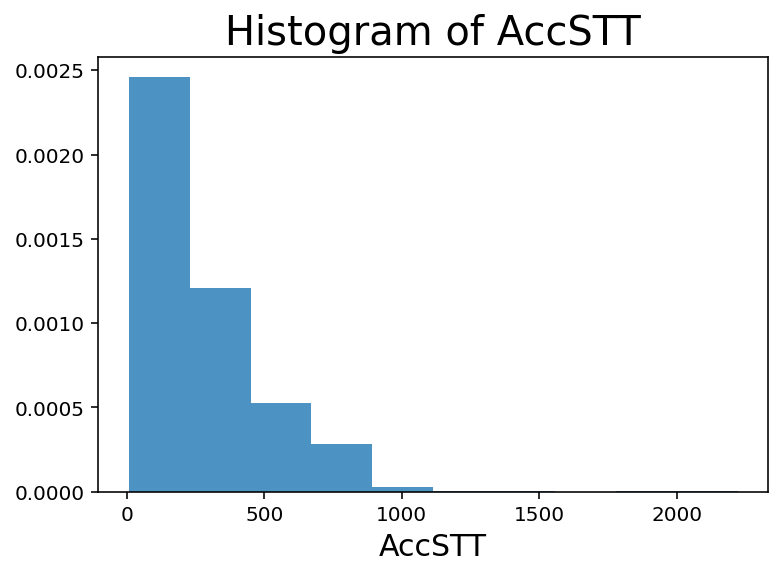

In [23]:
#Plotting a histrogram to visualise the AccSTT variable again
plt.hist(df['AccSTT'], bins=10, density=True, alpha=0.8);
plt.title('Histogram of AccSTT', fontsize=20)
plt.xlabel('AccSTT', fontsize=15)

In [24]:
from scipy.stats import poisson #importing poisson from stats

In [25]:
df_r1 = df.loc[df["# Route"] == 1, "AccSTT"].values #isolating Route 1 from the dataframe

In [26]:
lmda = df_r1.mean() #calculating Lambda or the mean of Route 1
print (lmda)

258.03846153846155


In [27]:
poisson_pd = poisson.pmf(df_r1, lmda) #calculating the probability mass function for each variable

In [28]:
poisson_pd #visualising the pmf as a numpy array

array([1.10858440e-19, 2.20072830e-49, 8.20399740e-03, 1.27974991e-24,
       1.54082865e-02, 6.40214100e-21, 1.48523164e-02, 2.76714676e-16,
       4.03722443e-04, 1.92624219e-12, 5.11083554e-08, 3.88486718e-09,
       3.47929565e-10, 1.08778659e-06, 2.51459562e-13, 1.41851640e-05,
       5.54195317e-16, 7.21561578e-04, 2.62229702e-17, 4.27714440e-03,
       5.90155092e-21, 1.91159035e-02, 6.61756046e-23, 2.45300343e-02,
       1.04305975e-24, 2.45501680e-02])

In [29]:
df_r1_df = pd.DataFrame(df_r1) #making a dataframe from the AccSTT for Route 1

In [30]:
df_r1_df #visualising the new dataframe of Route 1 AccSTT

,0
0,128
1,61
2,234
3,113
4,242
5,124
6,274
7,140
8,305
9,156


In [31]:
df_r1_df.rename(columns={0:'Route 1 AccSTT'}, inplace=True) #renaming the Route 1 AccSTT column. in the dataset

In [32]:
df_r1_df.insert(1, "pmf", poisson_pd, True) #inserting the pmf for each value as a column

In [33]:
df_r1_df #visualising the new Route 1 and pmf dataframe

,Route 1 AccSTT,pmf
0,128,1.108584e-19
1,61,2.200728e-49
2,234,8.203997e-03
3,113,1.279750e-24
4,242,1.540829e-02
5,124,6.402141e-21
6,274,1.485232e-02
7,140,2.767147e-16
8,305,4.037224e-04
9,156,1.926242e-12


In [34]:
# Sorting the values of Route 1 AccSTT in ascending order along with the linked pmf values

df_r1_df = df_r1_df.sort_values(by="Route 1 AccSTT", ascending=True, kind="mergesort" )

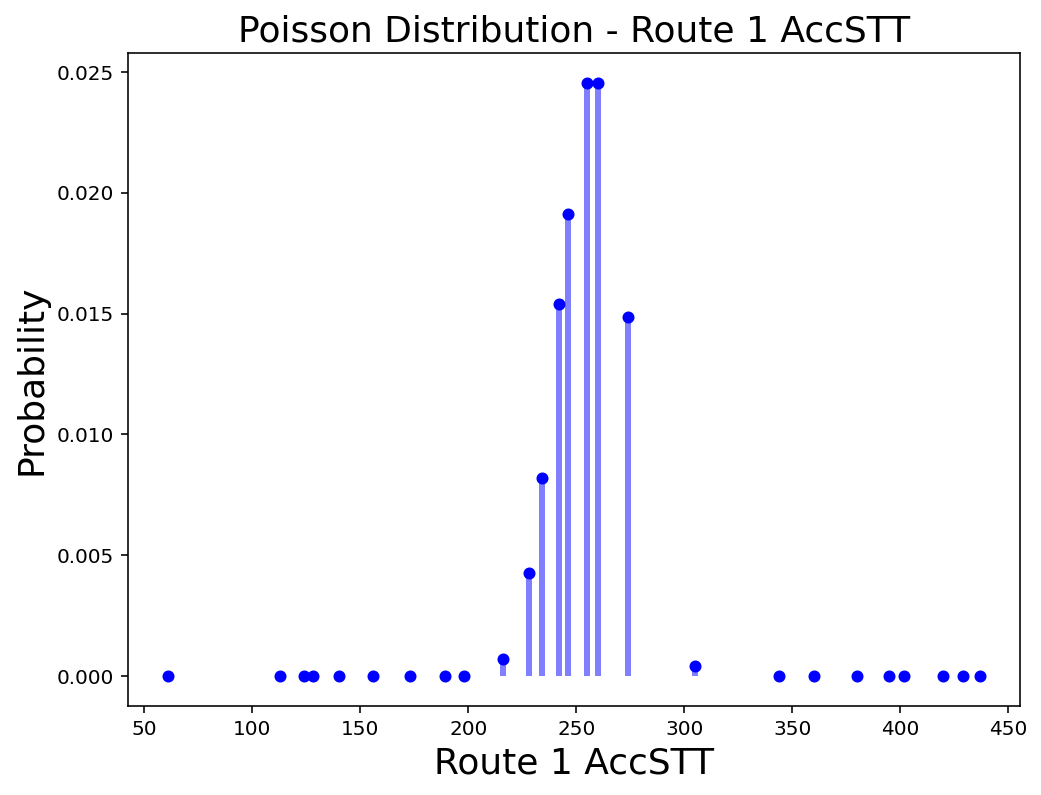

In [153]:
#Plotting a Poisson Distribution of ROute 1 AccSTT

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(df_r1_df['Route 1 AccSTT'], df_r1_df['pmf'], 'bo', ms=5, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("Route 1 AccSTT", fontsize="18")
plt.title("Poisson Distribution - Route 1 AccSTT", fontsize="18")
ax.vlines(df_r1_df['Route 1 AccSTT'], 0, df_r1_df['pmf'], colors='b', lw=3, alpha=0.5);

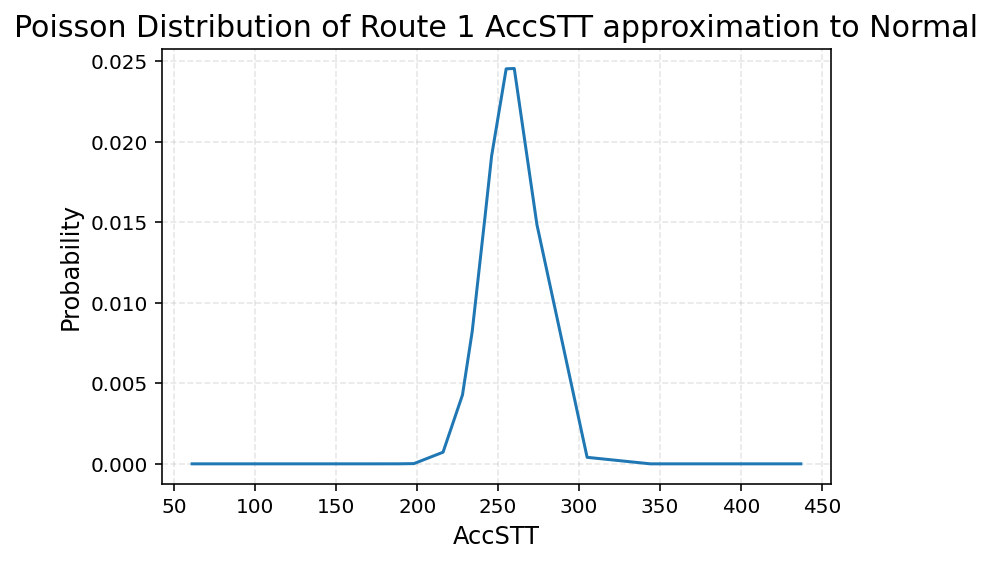

In [154]:
#highlighting the approximation to normal distribution
x = df_r1_df['Route 1 AccSTT']
y= df_r1_df['pmf']
plt.ylabel("Probability", fontsize="12")
plt.xlabel("AccSTT", fontsize="12")
plt.title("Poisson Distribution of Route 1 AccSTT approximation to Normal", fontsize="15")
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.plot(x, y);

In [36]:
#Calculating the probability of getting an AccSTT above the overall mean from 50 Routes at Route 1

Prob1AccSTT = poisson.sf(k=276.2217294900222, mu=258.03846153846155)

In [37]:
print(f"The probability of AccSTT above average AccSTT: {Prob1AccSTT}")

The probability of AccSTT above average AccSTT: 0.12585039800749592


In [38]:
#Calculating the probability of getting an AccSTT below the overall mean from 50 Routes at Route 1

Prob2AccSTT = poisson.cdf(k=276.2217294900222, mu=258.03846153846155)

In [39]:
print(f"The probability of AccSTT below average AccSTT: {Prob2AccSTT}")

The probability of AccSTT below average AccSTT: 0.8741496019925041


In [40]:
#Calculating the probability of getting an AccSTT below 100 at Route 1

Prob3AccSTT = poisson.cdf(k=100, mu=258.03846153846155)

In [41]:
print(f"The probability of AccSTT below 2 AccSTT: {Prob3AccSTT}")

The probability of AccSTT below 2 AccSTT: 2.2130005517789696e-29


#   

# 1.2.2 Approximating the normal distribution to AccSTT for Route 1

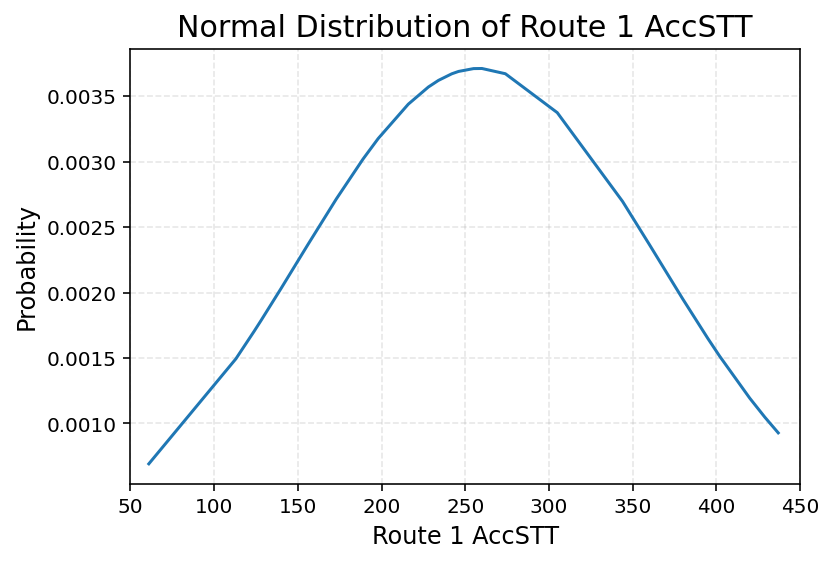

In [42]:
# Calculating mean and Stdev of Route 1 AccSTT
df_mean = np.mean(df_r1_df['Route 1 AccSTT'])
df_std = np.std(df_r1_df['Route 1 AccSTT'])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_r1_df['Route 1 AccSTT'].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_r1_df['Route 1 AccSTT'].sort_values(), pdf)
plt.title('Normal Distribution of Route 1 AccSTT', fontsize="15")
plt.xlim([50,450])  
plt.xlabel("Route 1 AccSTT", size=12)    
plt.ylabel("Probability", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

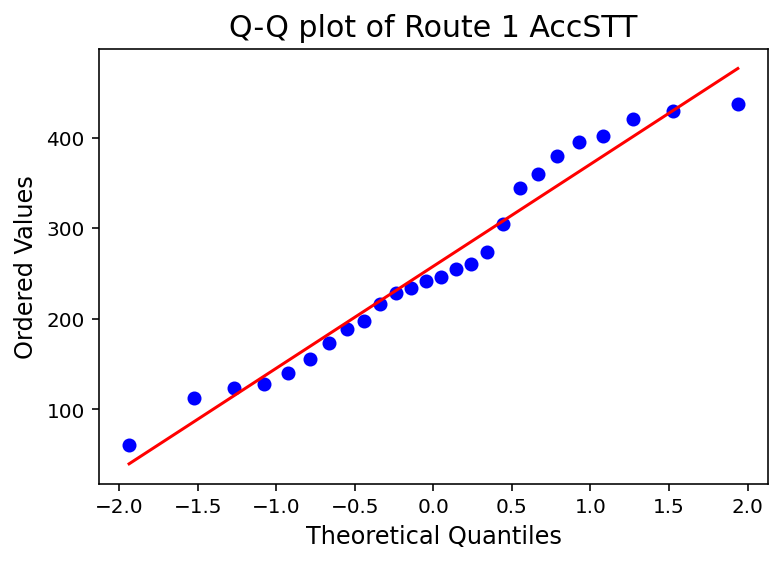

In [145]:
#Generating a Q-Q plot to highlight normaliity of the AccSTT values at Route 1
stats.probplot(df_r1_df['Route 1 AccSTT'], dist="norm", plot=plt)
plt.title('Q-Q plot of Route 1 AccSTT', fontsize="15")
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.ylabel("Ordered Values", fontsize="12")
plt.xlabel("Theoretical Quantiles", fontsize="12")
plt.show()

#   

# 1.3 Further Data Visualisation

- Given that AccSTT is the chosen dependent variable and the aim is to build a model which can predict the AccSTT at a given Route and Link, visualisation tools were employed to better understand trends in the data

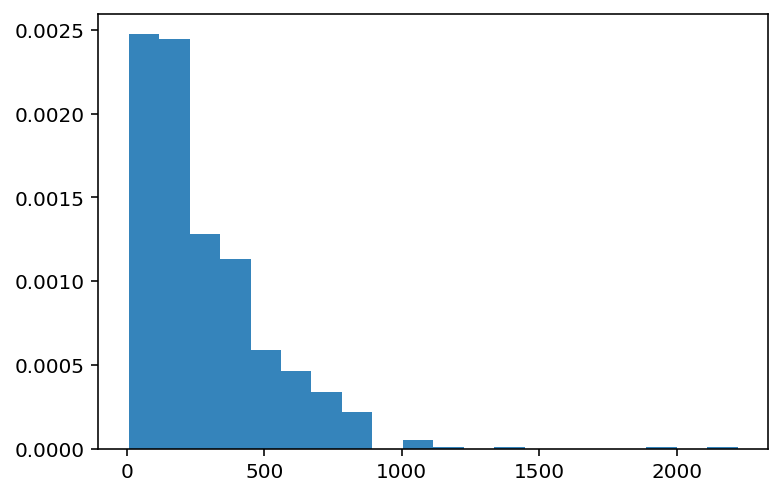

In [45]:
plt.hist(df['AccSTT'], bins=20, density=True, alpha=0.9); # Visualising the distribution of AccSTT

In [46]:
df.describe()

,# Route,Link,Direction,STT,AccSTT,TCS1,TCS2
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,24.458980,7.576497,1.500000,39.245011,276.221729,622.339246,622.339246
std,13.788315,6.639623,0.500277,45.472496,235.472406,1339.490187,1339.490187
min,1.000000,1.000000,1.000000,4.000000,7.000000,2.000000,2.000000
25%,14.000000,3.000000,1.000000,17.000000,111.250000,76.000000,76.000000
50%,21.000000,6.000000,1.500000,27.000000,203.500000,187.000000,187.000000
75%,36.000000,10.000000,2.000000,45.000000,392.750000,456.000000,456.000000
max,50.000000,33.000000,2.000000,731.000000,2222.000000,6032.000000,6032.000000


We can see that there is a large spread in the values between the different features which will make incorporation into an machine learning model difficult, thus the data was scaled to reduce any potential noise due to high variance

In [47]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(['AccSTT'],axis = 1),),
        columns=['# Route', 'Direction', 'STT', "Link", "TCS1", 'TCS2'])

In [48]:
y = df['AccSTT']

- To ascertain whether there was any correlation between the data, the correlation was plotted as a heatmap

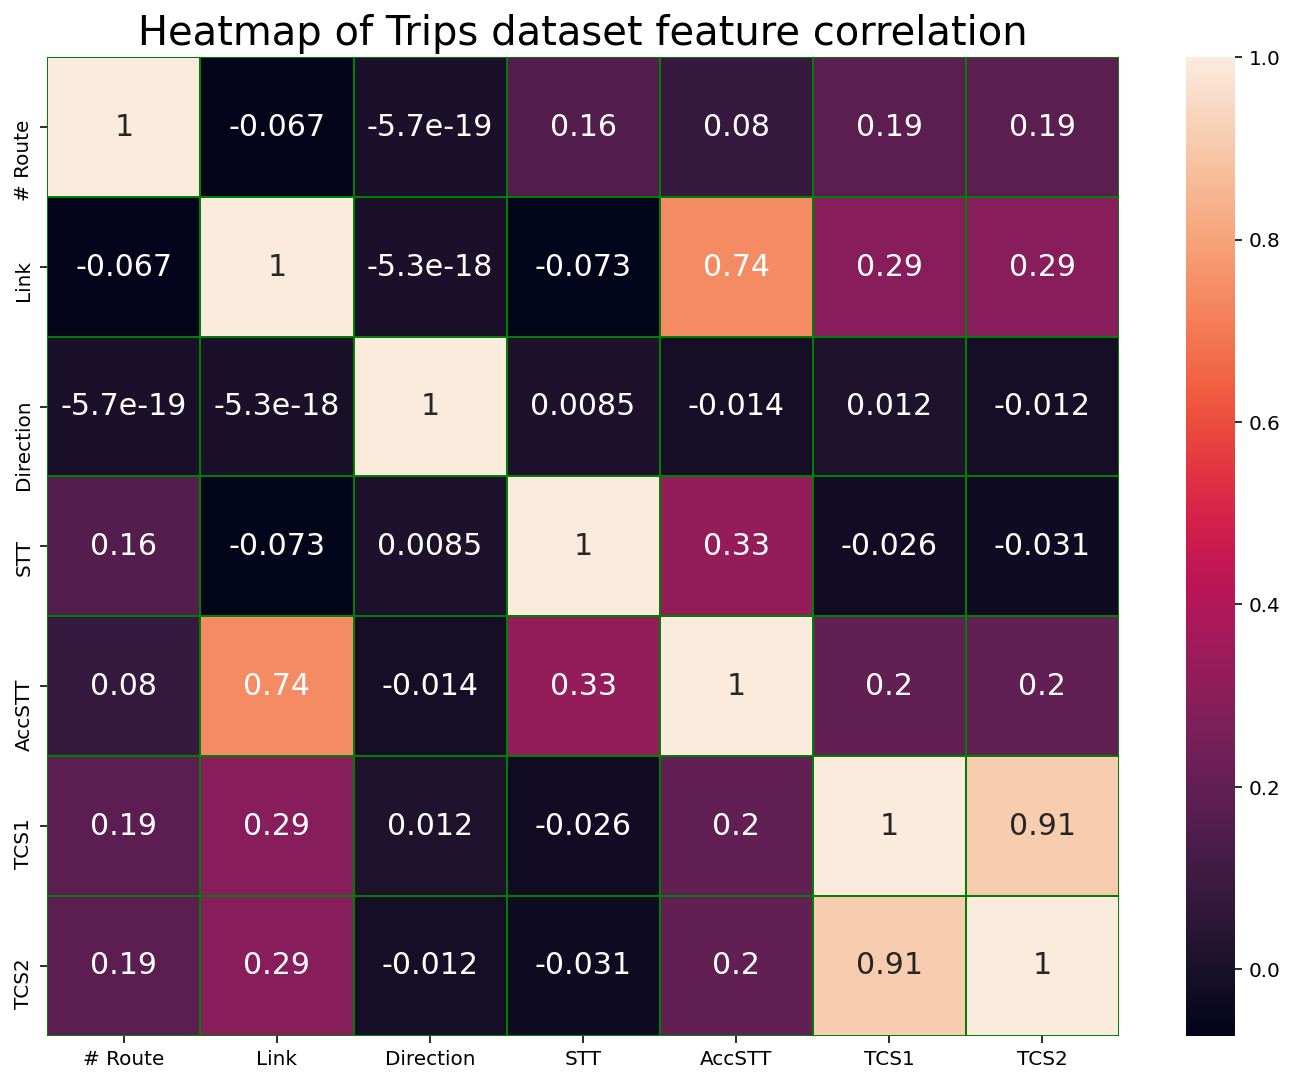

In [57]:
correlation = df.corr()

plt.figure(figsize=(12,9))
plt.title('Heatmap of Trips dataset feature correlation', fontsize='20')
sns.heatmap(correlation,annot=True,linecolor="green",lw=0.5, annot_kws={"fontsize":15});

- We can see from the heatmap that AccSTT is correlated with Link with a correlation coefficient of 0.74. We can also see that TSC1 and TCS2 are heavily correlated with a correlation coefficient of 0.91. This correlation between AccSTT and Link was an interesting finding and was furtherly investigated with visualisation by plotting the two features were plotted against eachother and drawing a line of best fit.

In [58]:
from statistics import mean

In [59]:
mean(df['AccSTT']) # calculating the mean of AccSTT 

276.2217294900222

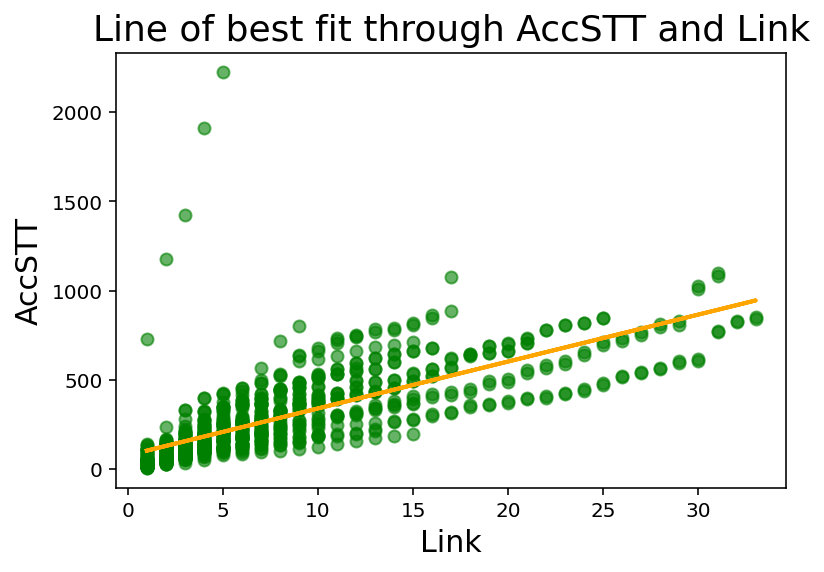

In [60]:
#plotting the correlated data as a scatter and drawing a best fit line

def best_fit_line(link_x, AccSTT_y):
    slope = (((mean(link_x)* mean(AccSTT_y)) - mean(link_x*AccSTT_y))/ (mean(link_x)*mean(link_x)- mean(link_x*link_x)))
    y_intercept = mean(AccSTT_y) - slope*mean(link_x)
    return slope, y_intercept

trips_link_list = df['Link'].tolist()
trips_AccSTT_list = df['AccSTT'].tolist()

link_x = np.array(trips_link_list, dtype=np.float64)
AccSTT_y = np.array(trips_AccSTT_list, dtype=np.float64)

slope, y_intercept = best_fit_line(link_x, AccSTT_y)

regression_line =[(slope* x) + y_intercept for x in link_x]

predict_AccSTT = 200.2
predict_Link = (slope*predict_AccSTT) + y_intercept

plt.scatter(link_x, AccSTT_y,label='data', alpha=0.6, color = 'green')

plt.title('Line of best fit through AccSTT and Link', fontsize='18')

plt.xlabel('Link', fontsize='15')

plt.ylabel('AccSTT', fontsize='15')

plt.plot(link_x, regression_line, label="best fit", color='orange', linewidth='2')
plt.show()


- We can see a strong positive correlation between Link and AccSTT wuth the exceotuin if 5 outliers, again highlighting the correlation. To find where these outliers were located another bar plot of the mean values for each route was employed to see if particular Route had high AccSTT values.

In [61]:
df_highAccSTT = df.loc[df['AccSTT'] >= 1100, '# Route'] #Identifying the Route with the outlier values

In [62]:
df_highAccSTT #The Route appears to be 44 pertaining to 4 values

799    44
801    44
803    44
805    44
Name: # Route, dtype: int64

In [63]:
df_highAccSTT44 = df.loc[df['# Route'] == 44] #locating Route 44 in the dataset

In [64]:
df_highAccSTT44 #visualising the high values in Route 44

,# Route,Link,Direction,STT,AccSTT,TCS1,TCS2
796,44,1,1,80,80,38,142
797,44,1,2,731,731,142,38
798,44,2,1,30,110,142,126
799,44,2,2,445,1176,126,142
800,44,3,1,18,128,126,35
801,44,3,2,250,1426,35,126
802,44,4,1,33,161,35,48
803,44,4,2,487,1913,48,35
804,44,5,1,59,220,48,49
805,44,5,2,309,2222,49,48


- There appear to be 4 values with higher than usual AccSTT values at indexes 799, 801, 803 and 805

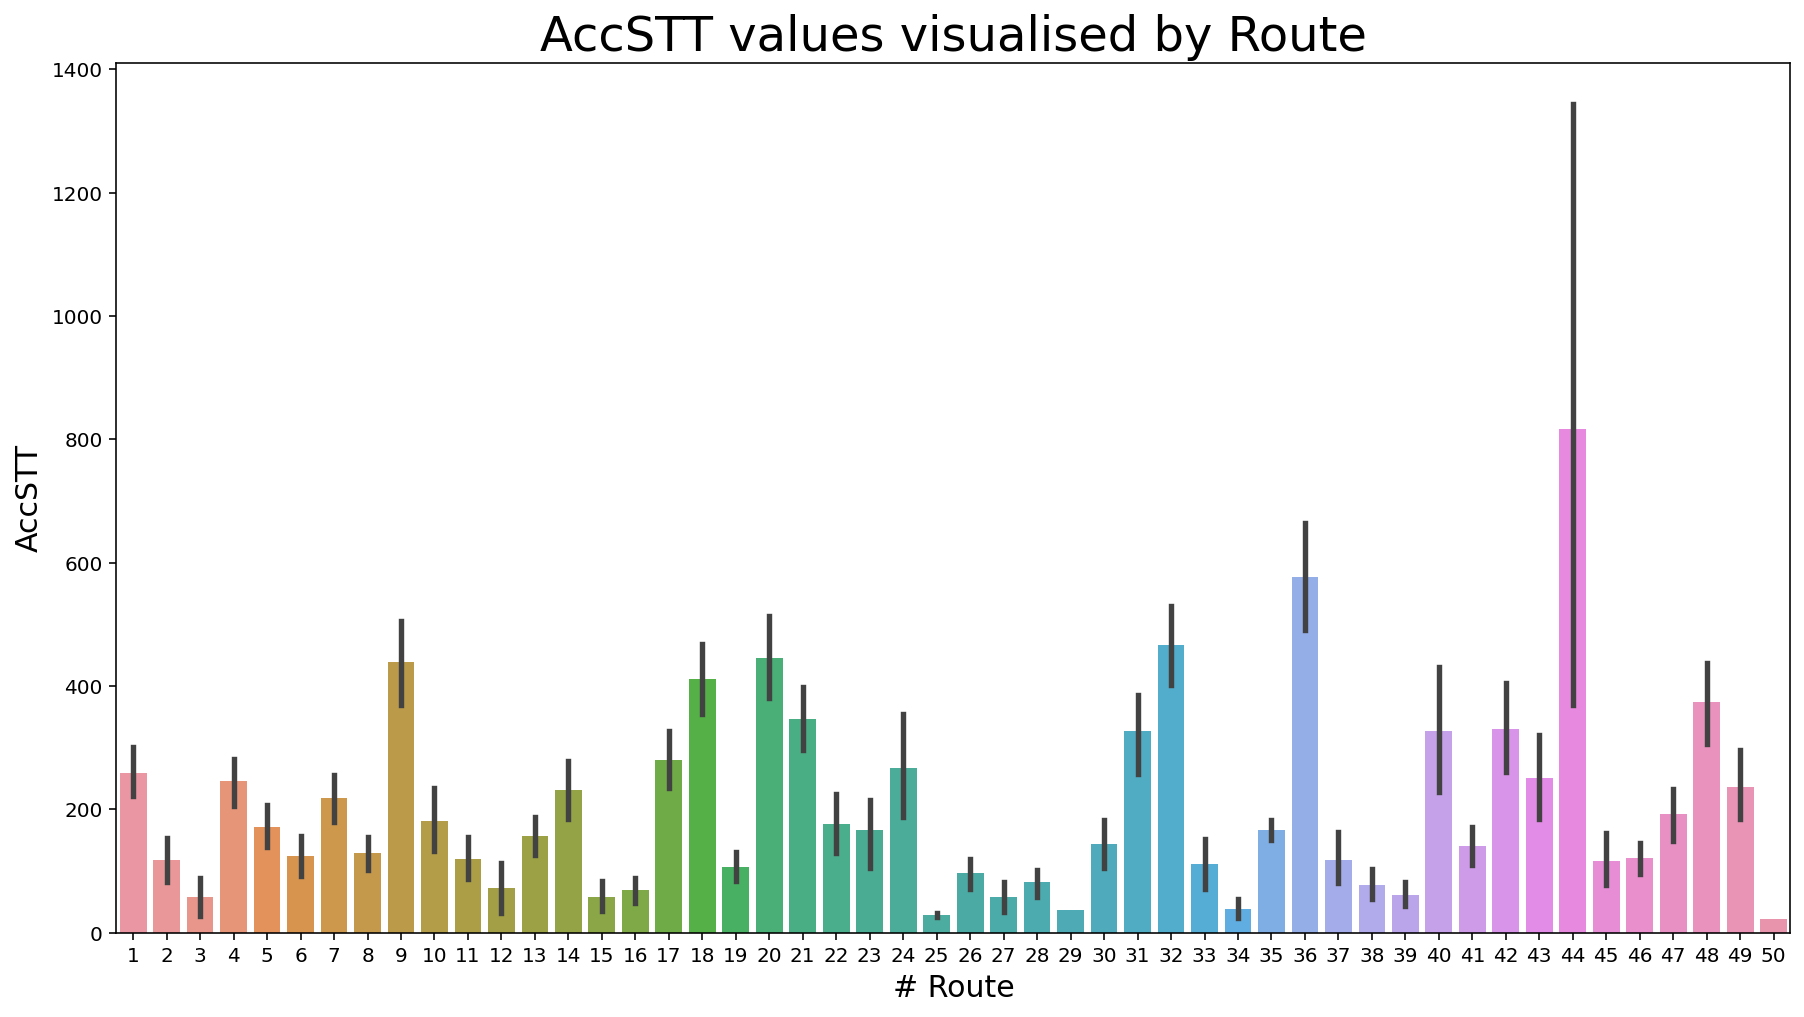

In [65]:
#creating a barplot to visualise the AccSTTT for each route

fig, ax = plt.subplots(figsize=(15, 8))

x= df['# Route']
y=df['AccSTT']

sns.barplot(x, y, ax=ax)
ax.set_xlabel('# Route', size=15)
ax.set_ylabel('AccSTT', size=15)
ax.set_title( "AccSTT values visualised by Route" , size = 24 )
plt.show()

# 1.4 Feature Engineering: scaling and winorization

- Data was winorized to mitigate the effects of outliers such as the AccSTT values located at Route 44

In [66]:
# Creating a dictionary of the column names

col_dict = {'# Route':1, 'Link':2, 'Direction':3, 'STT': 4, 'AccSTT':5, 'TCS1': 6, 'TCS2': 7}

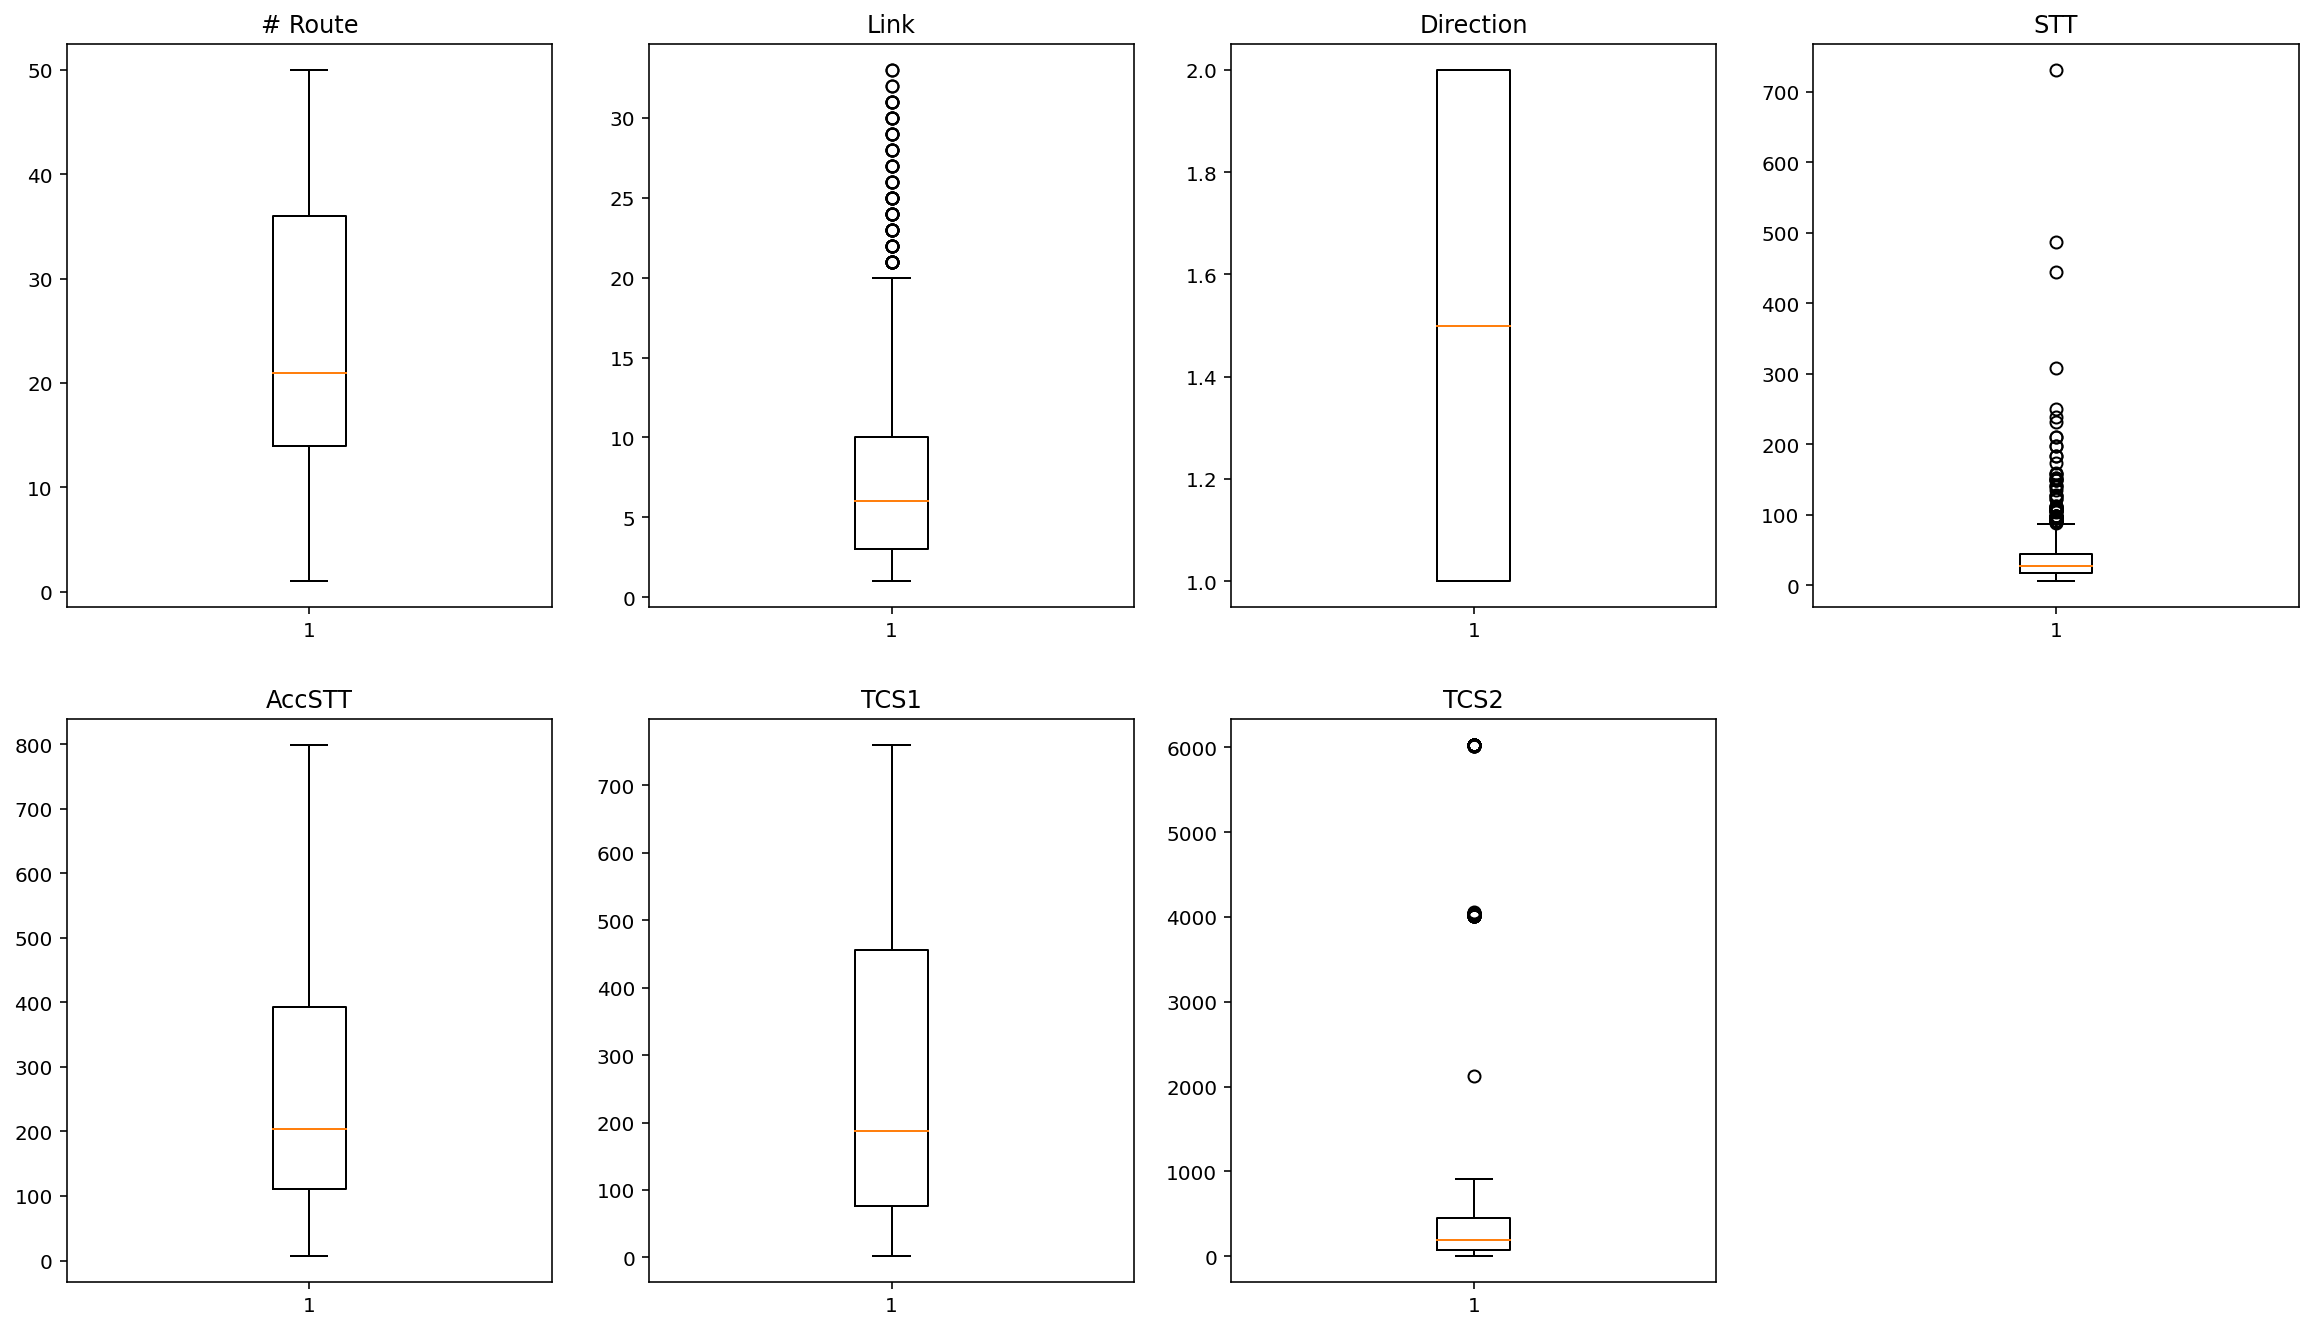

In [80]:
#Plotting each column as boxplots to observe the spread of data and potential outliers

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

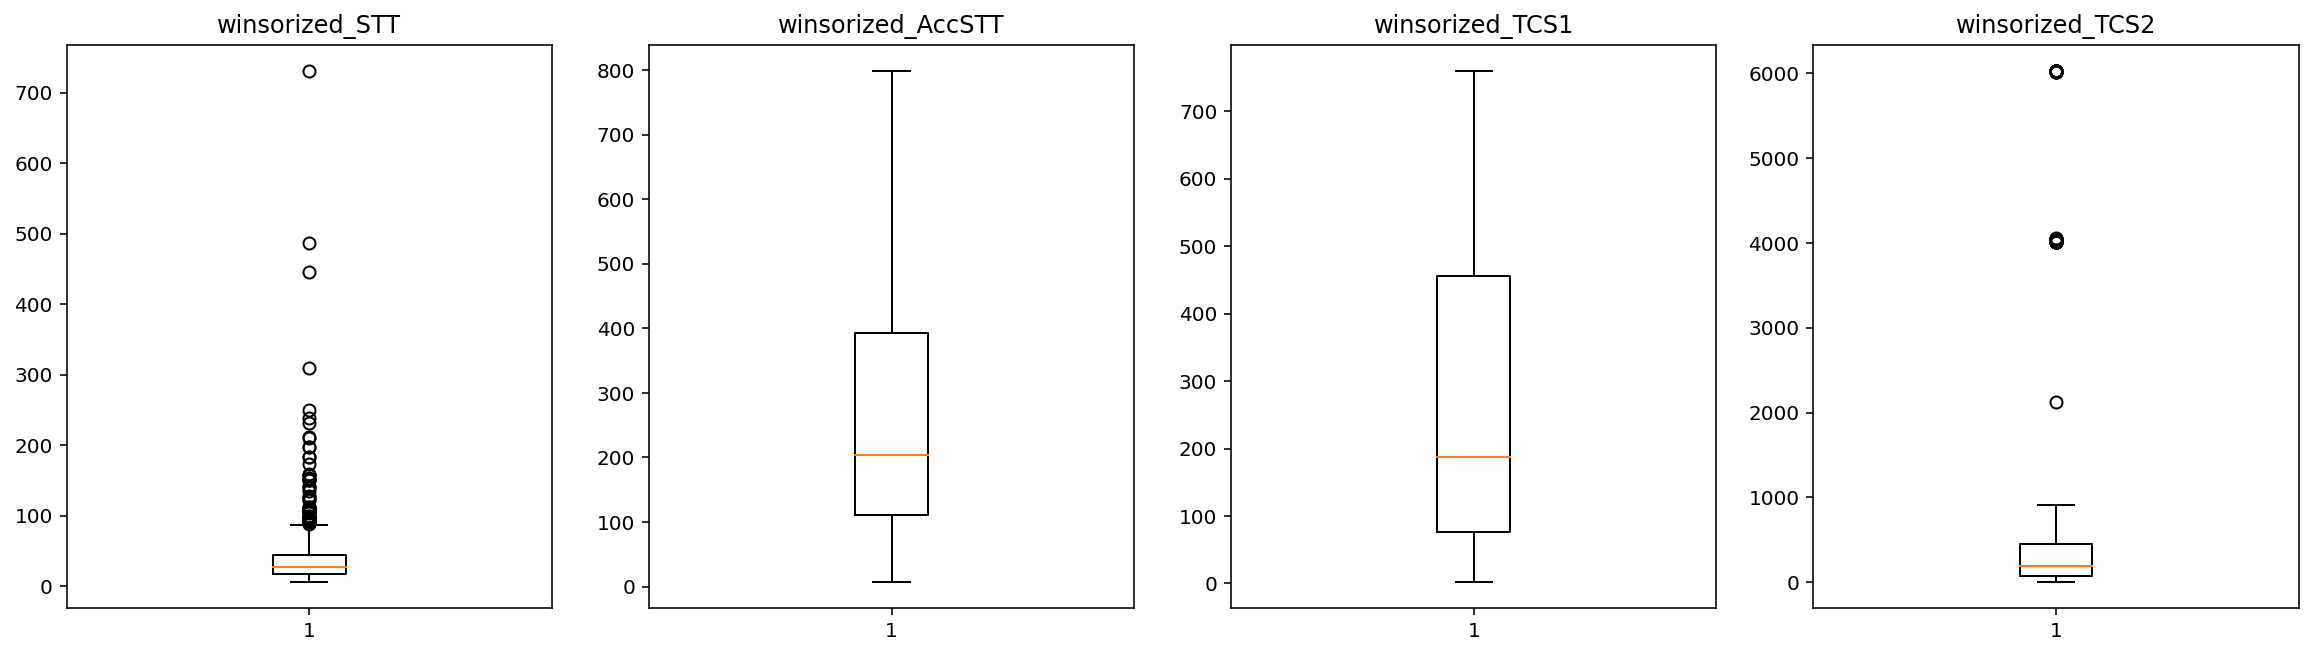

In [81]:
#Winorizing the data with a outliers to reduce their effects before model implementation

plt.figure(figsize=(20,30))

plt.subplot(5,4,1)
winsorized_STT = winsorize(df['STT'],(0.01,0))
plt.boxplot(winsorized_STT)
plt.title("winsorized_STT")

plt.subplot(5,4,2)
winsorized_AccSTT = winsorize(df['AccSTT'],(0,0.03))
plt.boxplot(winsorized_AccSTT)
plt.title("winsorized_AccSTT")

plt.subplot(5,4,3)
winsorized_TCS1 = winsorize(df['TCS1'],(0,0.11))
plt.boxplot(winsorized_TCS1)
plt.title("winsorized_TCS1")

plt.subplot(5,4,4)
winsorized_TCS2 = winsorize(df['TCS2'],(0,0.01))
plt.boxplot(winsorized_TCS2)
plt.title("winsorized_TCS2")

plt.show()

In [82]:
# Redefining the orignal column data with the winorized data

df['STT'] = winsorized_STT
df['AccSTT'] = winsorized_AccSTT
df['TCS1'] = winsorized_TCS1
df['TCS2'] = winsorized_TCS2

In [83]:
# Scaling the data before model implementation

scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [84]:
#Visualising the scaled data

df_scale.head()

,# Route,Link,Direction,STT,AccSTT,TCS1,TCS2
0,-1.702311,-0.991042,-1.0,1.953045,-0.674510,1.884677,-0.334151
1,-1.702311,-0.991042,1.0,0.478514,-0.992258,-0.453104,1.123987
2,-1.702311,-0.840347,-1.0,1.468870,-0.171803,-0.453104,-0.334898
3,-1.702311,-0.840347,1.0,0.280442,-0.745648,-0.457100,-0.334151
4,-1.702311,-0.689653,-1.0,-0.687906,-0.133863,-0.457100,-0.005472


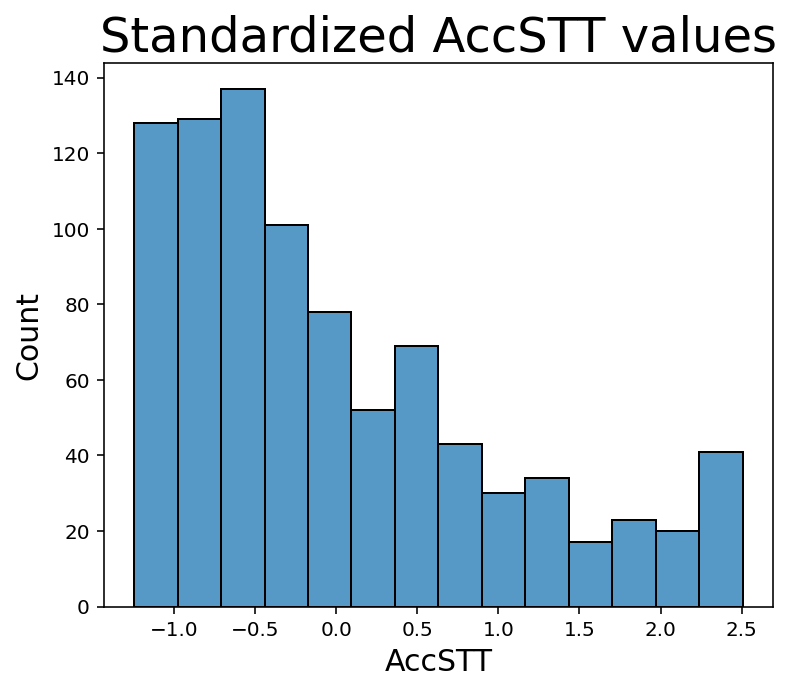

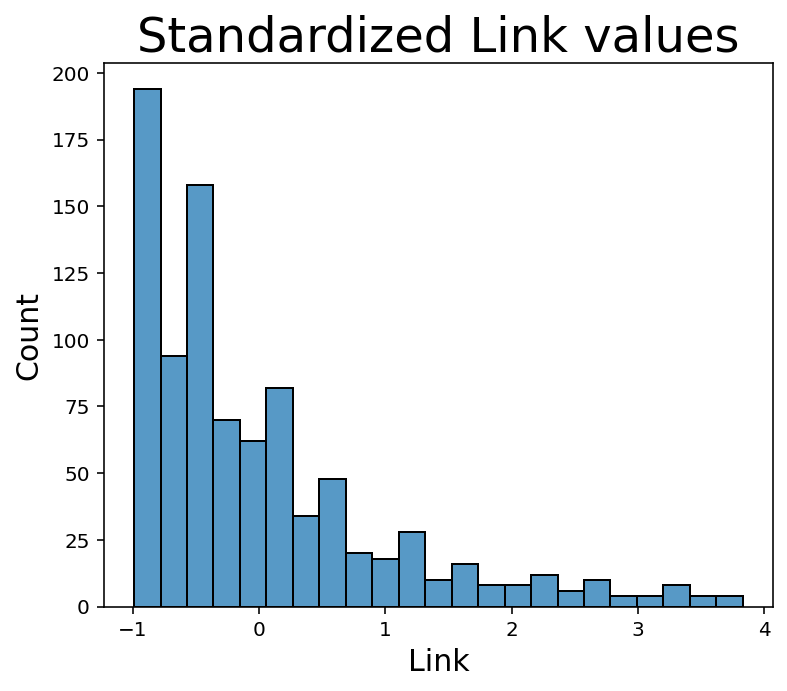

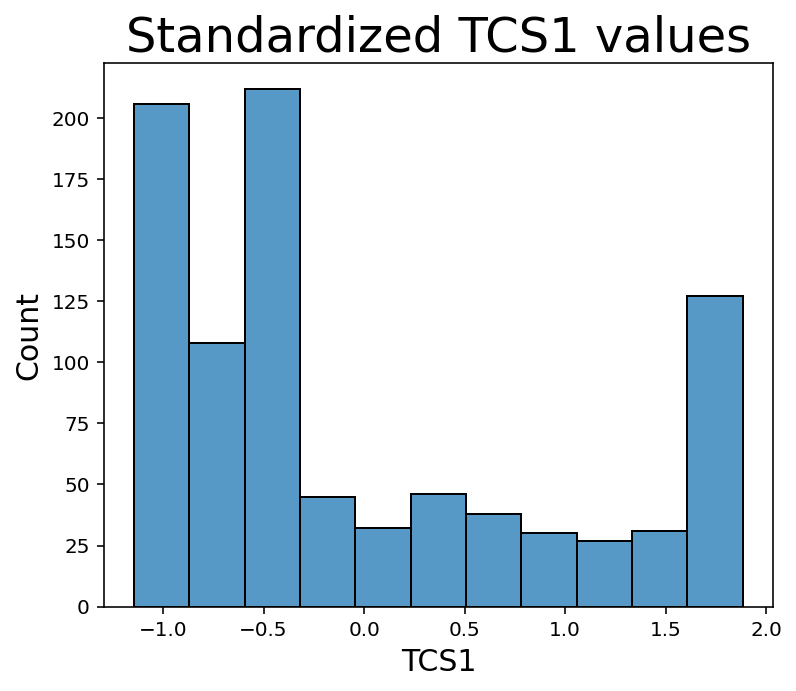

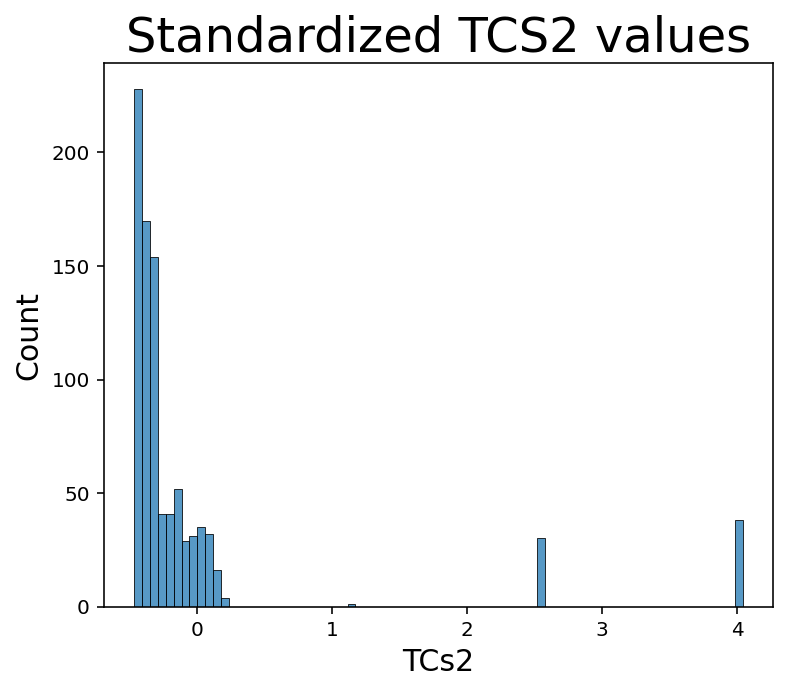

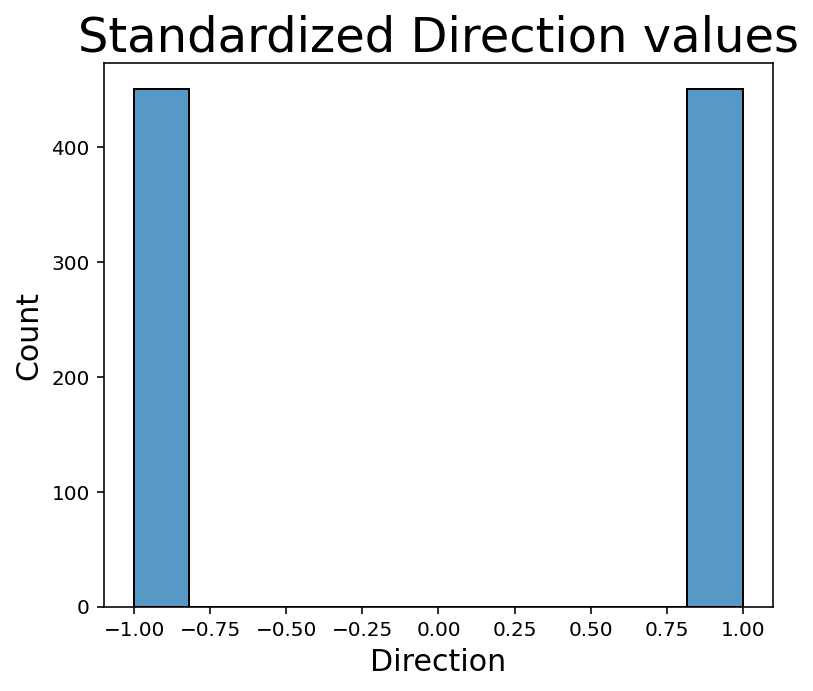

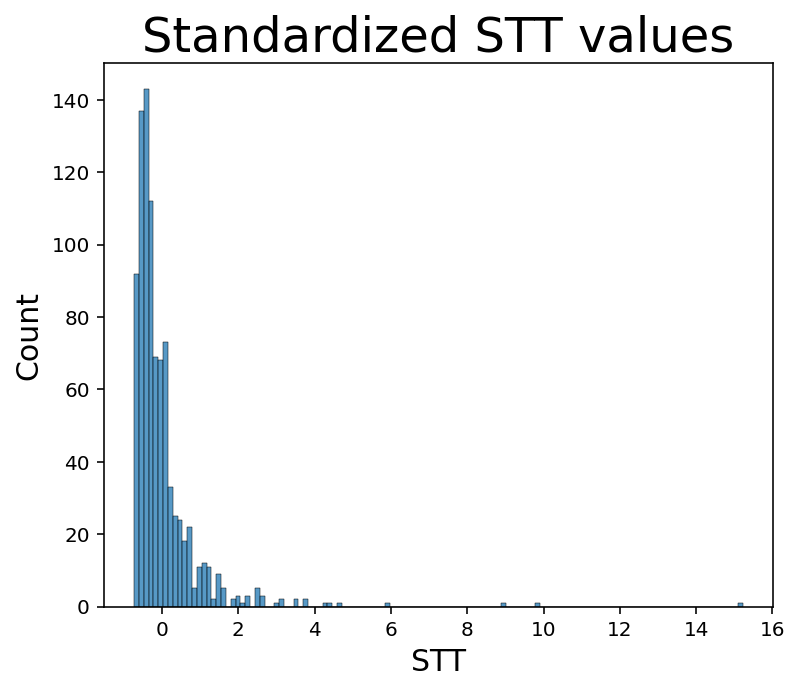

In [85]:
#visualising the scaled data

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['AccSTT']

sns.histplot(x, ax=ax);
ax.set_xlabel('AccSTT', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized AccSTT values" , size = 24 )
plt.show()

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['Link']

sns.histplot(x, ax=ax);
ax.set_xlabel('Link', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized Link values" , size = 24 )
plt.show()

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['TCS1']

sns.histplot(x, ax=ax);
ax.set_xlabel('TCS1', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized TCS1 values" , size = 24 )
plt.show()

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['TCS2']

sns.histplot(x, ax=ax);
ax.set_xlabel('TCs2', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized TCS2 values" , size = 24 )
plt.show()

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['Direction']

sns.histplot(x, ax=ax);
ax.set_xlabel('Direction', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized Direction values" , size = 24 )
plt.show()

fig, ax = plt.subplots(figsize=(6,5))

x= df_scale['STT']

sns.histplot(x, ax=ax);
ax.set_xlabel('STT', size=15)
ax.set_ylabel('Count', size=15)
ax.set_title( "Standardized STT values" , size = 24 )
plt.show()


# 1.5 Linear Regression Model

In [316]:
#Defining X and y for implementation of ML models

y = df['AccSTT']
X = df_scale.drop(['AccSTT'],axis=1)

In [317]:
#Splitting the data into training and testing sets, defining the test size and random state

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [318]:
#visualiising the shape of the train and test sets

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(631, 6)
(271, 6)
(631,)
(271,)


In [319]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [320]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [321]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.7366743553030684
-----Test set statistics-----
R-squared of the model in test set is: 0.7405006418651396
Root mean squared error of the prediction is: 101.49626136523459
Mean absolute percentage error of the prediction is: 53.59653175470183


In [322]:
#Printing the cross validation scores from the linear regression model
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.66290399, 0.7578965 , 0.73654173, 0.69966347, 0.74726991])

In [323]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [324]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifying the model
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [325]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007937,0.001142,0.001702,0.000228,1,{'n_features_to_select': 1},0.712923,0.575921,0.676557,0.652994,...,0.630335,0.066108,5,0.612486,0.643882,0.622065,0.626247,0.658003,0.632537,0.016300
1,0.005487,0.000059,0.001425,0.000059,2,{'n_features_to_select': 2},0.757403,0.675033,0.724213,0.738064,...,0.721173,0.027700,4,0.720531,0.738248,0.729509,0.725817,0.732147,0.729251,0.005953
2,0.004670,0.000139,0.001380,0.000076,3,{'n_features_to_select': 3},0.754000,0.687325,0.735429,0.735863,...,0.726278,0.022440,2,0.727990,0.742217,0.734057,0.733609,0.737610,0.735096,0.004708
3,0.003805,0.000091,0.001355,0.000054,4,{'n_features_to_select': 4},0.756227,0.689508,0.734567,0.734752,...,0.726007,0.022436,3,0.728945,0.742951,0.735622,0.734768,0.739759,0.736409,0.004755
4,0.003363,0.000493,0.001356,0.000090,5,{'n_features_to_select': 5},0.758006,0.691223,0.733620,0.737687,...,0.727423,0.022392,1,0.729591,0.743509,0.736752,0.735485,0.740355,0.737138,0.004707


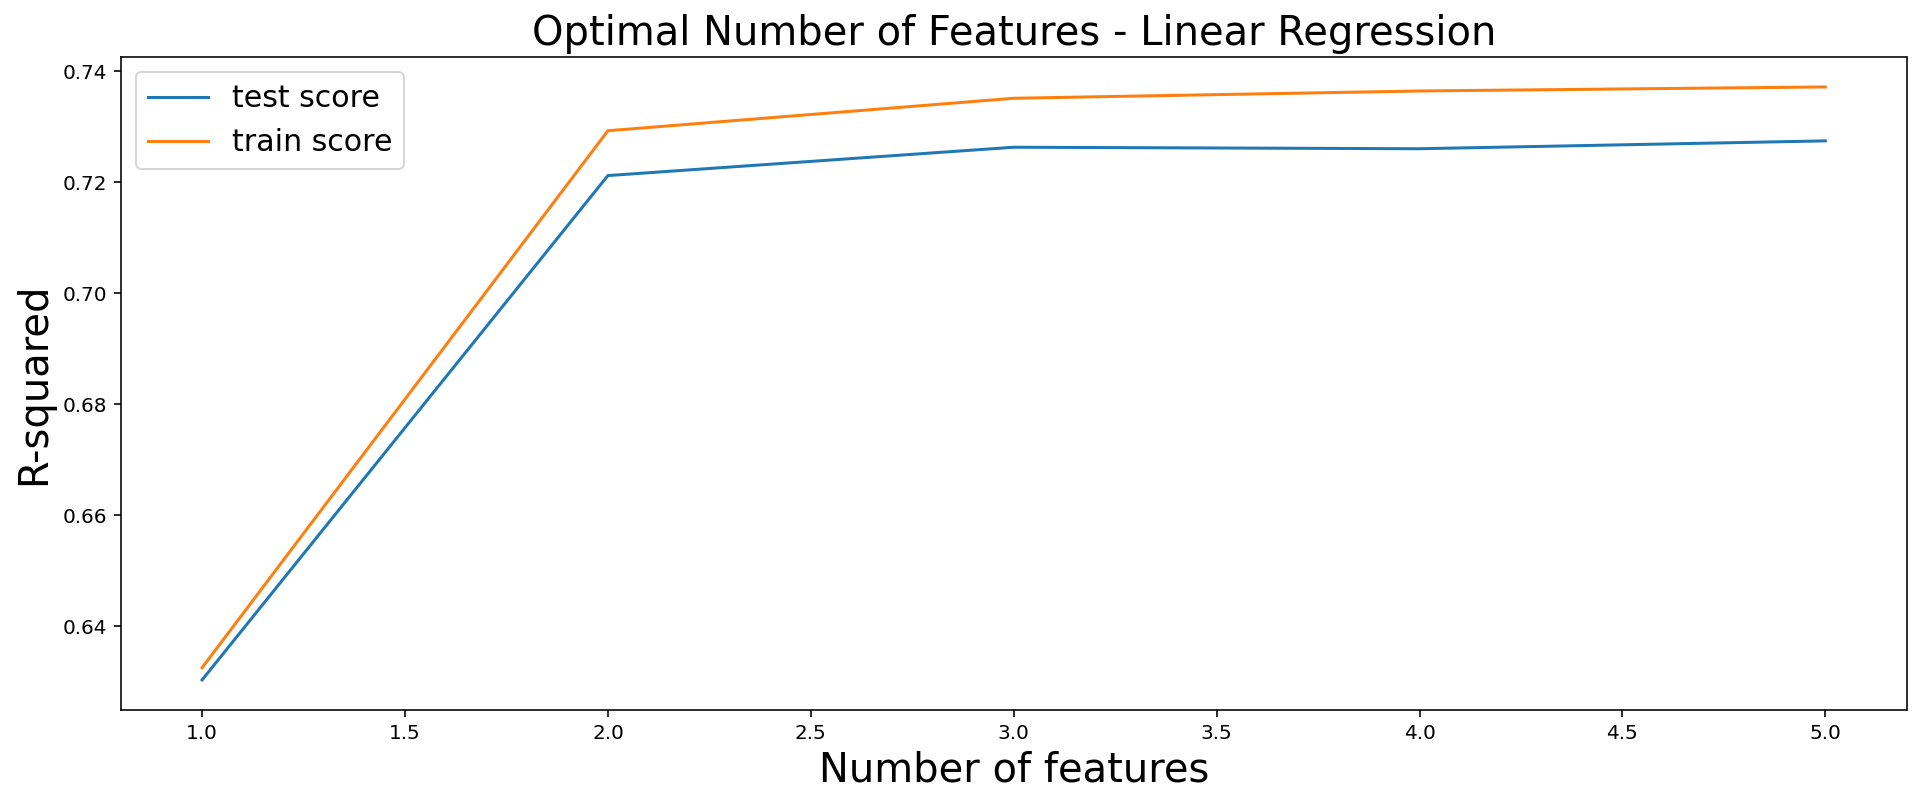

In [326]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - Linear Regression", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize= '15');

In [310]:
# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predicting test score after cross validation
Y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.7405006418651396


# 1.6 Ridge Regression

In [193]:
# Using GridSearch and Ridge regression parameter optimization 
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [194]:
#Printing R squared, RMSE and MAPE from Ridge Regression model
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

R-squared of the model in training set is: 0.7366720820780441
-----Test set statistics-----
R-squared of the model in test set is: 0.7406267671202196
Root mean squared error of the prediction is: 101.47159310057872
Mean absolute percentage error of the prediction is: 53.789538599029875


# 1.7 Lasso Regression

In [195]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [196]:
#Printing R squared, RMSE and MAPE from Lasso Regression model
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

R-squared of the model in training set is: 0.7364554283929869
-----Test set statistics-----
R-squared of the model in test set is: 0.740237078116093
Root mean squared error of the prediction is: 101.54779125411352
Mean absolute percentage error of the prediction is: 54.15923735055197


# 1.8 Decision Tree Regressor

In [327]:
#Splitting the datta for decision Tree regressor
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state= 80)

In [328]:
#Importing Decisino Tree Regressir abd fitting it t the training sets
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [329]:
y_pred_DT = DTregressor.predict(X_test)

In [330]:
#Printing R squared, RMSE and MAPE from DTRegressor model

print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.757910514550282
Root mean squared error of the prediction is: 98.03245189026049
Mean absolute percentage error of the prediction is: 27.25031577599641


In [331]:
#Visualising cross validation scores 
dtr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.68806578, 0.84590553, 0.80500636, 0.68549406, 0.63266906])

In [332]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifiying the model for gridsearch CV
dtr = dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
rfe = RFE(dtr)             

# GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [333]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011058,0.000786,0.001995,0.000357,1,{'n_features_to_select': 1},0.674257,0.585703,0.624981,0.698158,...,0.623359,0.059407,5,0.669671,0.690389,0.684745,0.672288,0.714791,0.686377,1.614750e-02
1,0.007902,0.000107,0.001558,0.000147,2,{'n_features_to_select': 2},0.703556,0.602488,0.604581,0.757934,...,0.657802,0.062301,4,0.981449,0.983712,0.981875,0.980886,0.980048,0.981594,1.222973e-03
2,0.006983,0.000140,0.001603,0.000165,3,{'n_features_to_select': 3},0.815756,0.847812,0.800807,0.859425,...,0.772052,0.119679,1,0.997588,0.997443,0.999923,0.997529,1.000000,0.998497,1.197225e-03
3,0.006138,0.000212,0.001531,0.000219,4,{'n_features_to_select': 4},0.682634,0.822956,0.771640,0.847990,...,0.750422,0.083770,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.999843e-09
4,0.004617,0.000095,0.001429,0.000065,5,{'n_features_to_select': 5},0.633888,0.855402,0.801968,0.835773,...,0.749983,0.100805,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.999843e-09


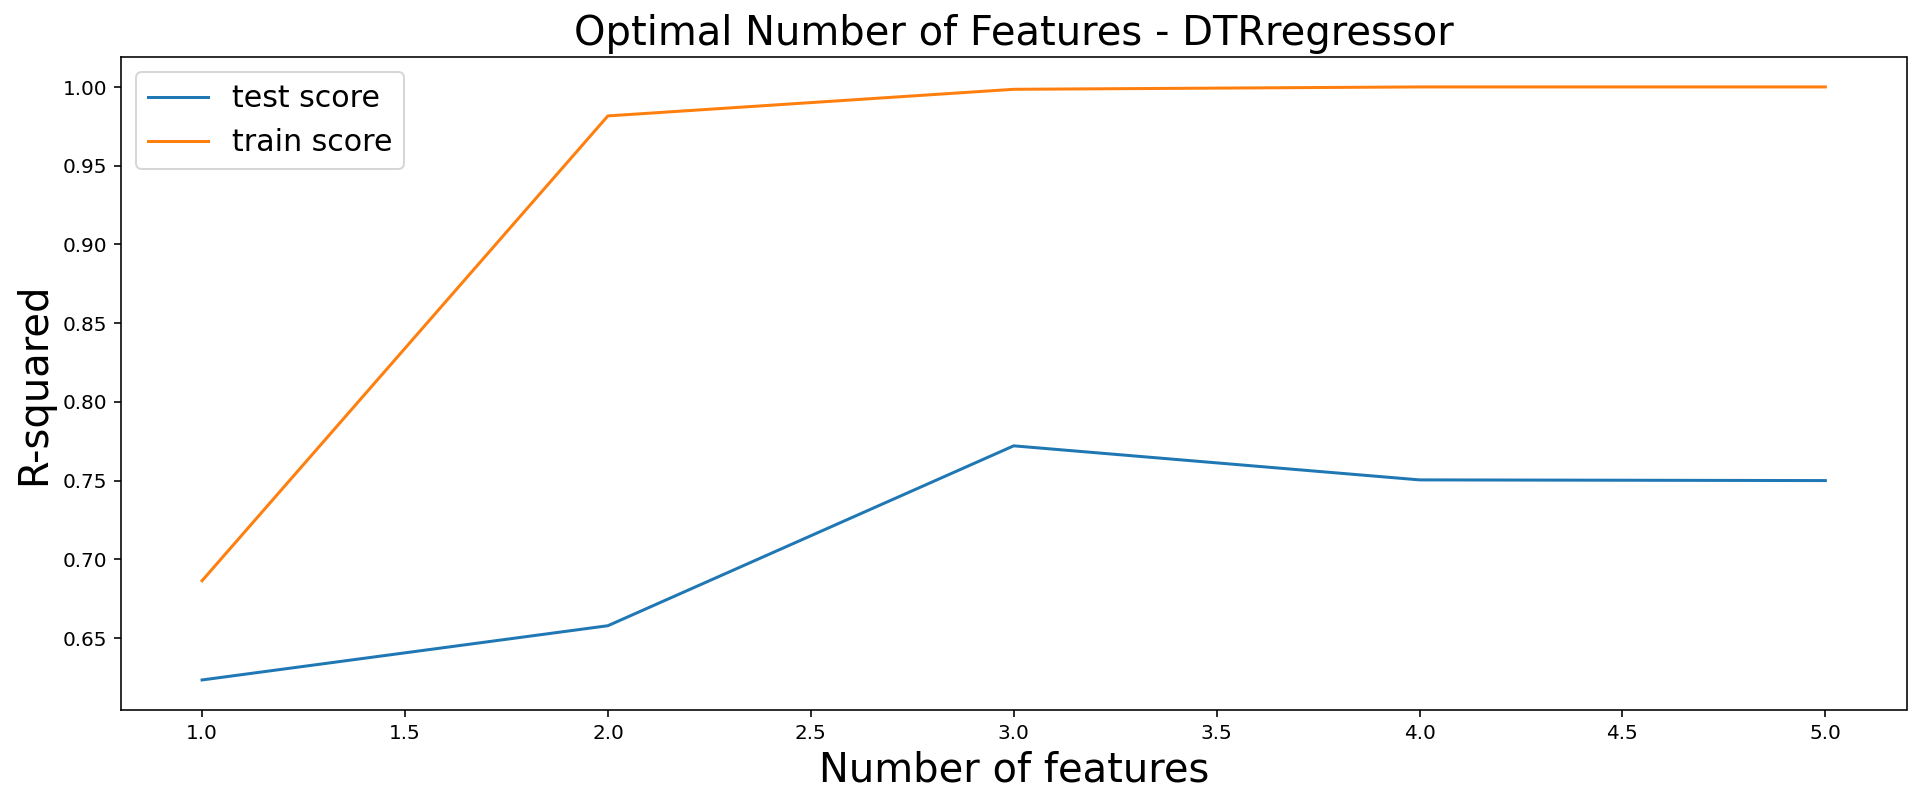

In [334]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - DTRregressor", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize='15');

In [307]:
# final model
n_features_optimal = 5

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

rfe = RFE(dtr, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predicting test score after cross validation
Y_pred = dtr.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.733572062843314


#  1.9 KNN Regressor

In [230]:
#Importing KNRegressor and fitting the model

from sklearn.neighbors import KNeighborsRegressor
KNregressor = KNeighborsRegressor(n_neighbors=5)
KNregressor.fit(X_train, Y_train)

KNeighborsRegressor()

In [231]:
y_pred_KN = KNregressor.predict(X_test)

In [232]:
#printing the R squared, RMSE and MAPE of the model

print("R-squared of the model in training set is: {}".format(KNregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(KNregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_KN)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_KN) / Y_test)) * 100))

R-squared of the model in training set is: 0.8532135175867861
-----Test set statistics-----
R-squared of the model in test set is: 0.7594318290567207
Root mean squared error of the prediction is: 97.72394359260946
Mean absolute percentage error of the prediction is: 51.59764032733287


# 1.10 Random Forest Regressor

In [335]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=100)
RFregressor.fit(X_train, Y_train)

RandomForestRegressor()

In [336]:
y_pred_RF = RFregressor.predict(X_test)

In [337]:
#printing the R squared, RMSE and MAPE of the model

print("R-squared of the model in training set is: {}".format(RFregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(RFregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_RF)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_RF) / Y_test)) * 100))

R-squared of the model in training set is: 0.9829125369648546
-----Test set statistics-----
R-squared of the model in test set is: 0.8862578980537745
Root mean squared error of the prediction is: 67.19586147147001
Mean absolute percentage error of the prediction is: 21.9191144942502


In [338]:
#Defining the model and printing the cross validation scores 

rfr = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rfr, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.84851169, 0.86779226, 0.91057283, 0.82474423, 0.80489385])

In [339]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifiying the model for gridsearch CV
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)
rfe = RFE(rfr)             

# GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [340]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.817223,0.010089,0.007690,0.000080,1,{'n_features_to_select': 1},0.679895,0.590344,0.624874,0.698011,...,0.625453,0.059665,5,0.669361,0.689829,0.684398,0.672008,0.714482,0.686016,0.016131
1,0.718075,0.002458,0.008394,0.000189,2,{'n_features_to_select': 2},0.779067,0.739053,0.683910,0.824839,...,0.751009,0.047759,4,0.953418,0.954772,0.954163,0.950413,0.950464,0.952646,0.001853
2,0.596238,0.001315,0.009052,0.000819,3,{'n_features_to_select': 3},0.884015,0.895899,0.874757,0.911901,...,0.875351,0.034872,1,0.982699,0.981029,0.980599,0.978685,0.979563,0.980515,0.001364
3,0.474949,0.021004,0.008598,0.000092,4,{'n_features_to_select': 4},0.859377,0.887872,0.860188,0.921768,...,0.864942,0.041546,2,0.980390,0.981236,0.981669,0.979829,0.978583,0.980341,0.001088
4,0.315924,0.002221,0.008689,0.000078,5,{'n_features_to_select': 5},0.871381,0.882993,0.858216,0.918401,...,0.864135,0.042263,3,0.980858,0.979928,0.978727,0.979707,0.977258,0.979296,0.001224


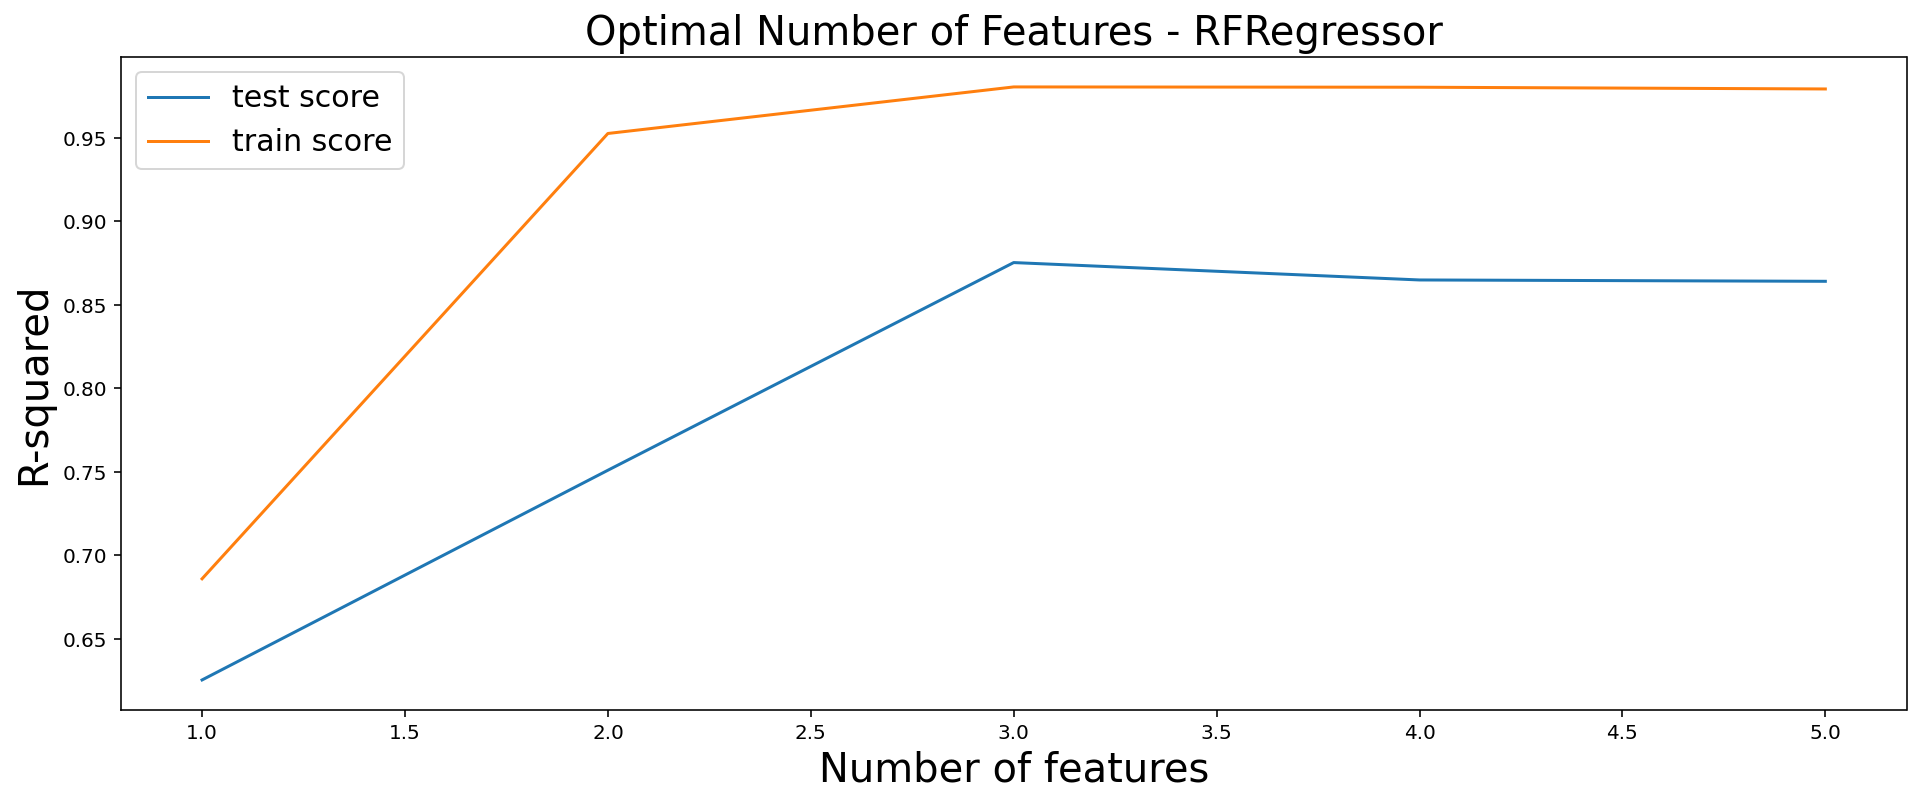

In [341]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - RFRegressor", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize='15');

In [294]:
import sklearn

In [305]:
# final model
n_features_optimal = 3

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)

rfe = RFE(rfr, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
Y_pred = rfr.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.8849114889823322


# 1. 11 Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier # import Random Forest classifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=42)
# fit the model
rfc.fit(X_train, Y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.0812


In [130]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)



# fit the model to the training set

clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [131]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

STT          0.215950
TCS2         0.201111
Link         0.184052
TCS1         0.176811
# Route      0.165747
Direction    0.056329
dtype: float64

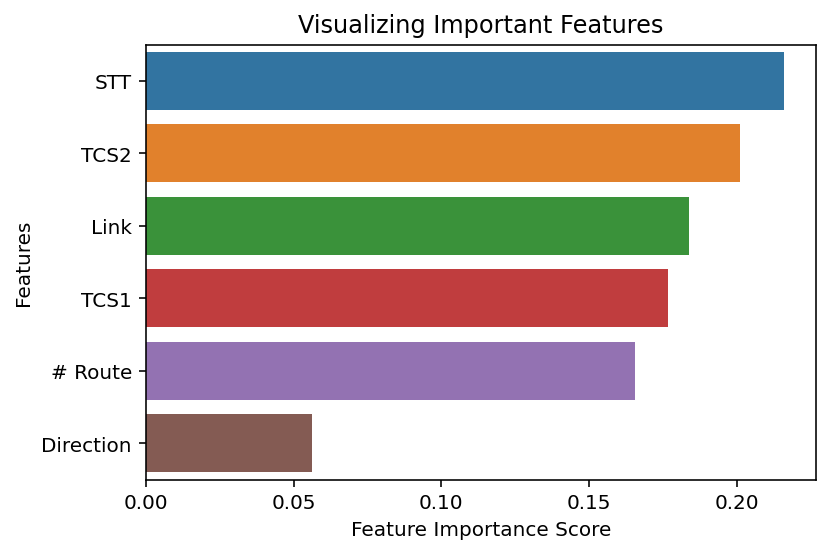

In [132]:
# Visualising important features
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

# 1.12 KNN

In [351]:

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [352]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [353]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 4.428044280442804 % and k = [7, 8]


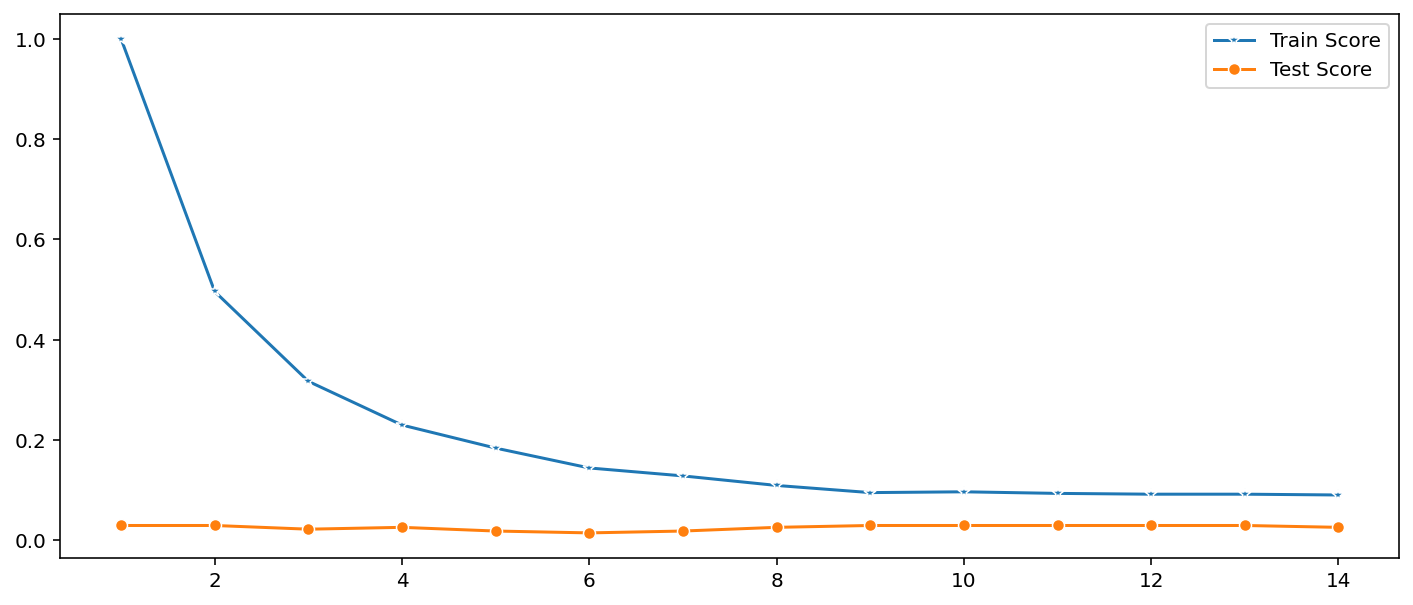

In [136]:
#Visualising train and test accuracies for KNN

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

# 1.13 Naive Bayes Classifier

In [355]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

# Training the model 
nvclassifier.fit(X_train, Y_train)

GaussianNB()

In [356]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[561 280 113  14 605  77 561 126  77 133 204  50 133 126 676 414 676 105
 154 133 561 204 191 204  50 305 366 365 676 799 185 393 137 105 366 105
 380 155 155 204 253 365 365  73 204 280 301  77 676 133 365 127 126 138
  94 365 440 127 561 365 373 204 605 676 305 204 301 191 210 105  94  19
 373 365 366 133  94 105 365 365  77 440  46 191 366  94 676 305 380 366
 113 440 676 133 561 204 380 126 105 380  98 380 191  77 113 204 380 105
 380 407 277 295  98  50 305 105 210 366 799 616 113 133 366 799  77 605
 116 127 305 199 305 393 676 366 366 204 365 799 112 204  57 440 253 676
 482 109  18 204  94 380 114 365 154 676 569 380 676 126  94 616 295 105
 105 183 676 380  22 561 440 199 191 105 440 133 204 155 126 191 155 204
  94 138 113 133 113  77 185 366 569 305 191 605 185 183 561 105  50 365
 183 366 241 605 365 114 191 185 305 185 414 204  67 204 414 380  18 366
 114 199 204 380 561  94 183 301 456 295  22  22 305 380 280 105 133 114
 380 185 605 138 191 167 433 241  94  18 133 277 12

In [357]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]


In [358]:
# Assessing accuracy metrics for Naive bayes classifier model
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.04797047970479705


# 1.14 Support Vector Machine

In [359]:
from sklearn.svm import SVC

In [360]:
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 1000, gamma = 0.9)

# Train model
svmModel.fit(X_train,Y_train)

# Storing the predicted values into Y_pred
Y_pred = svmModel.predict(X_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(Y_test, Y_pred)*100,2))

Accuracy in SVC =  2.58


# End of file